# Financial Econometrics I

#### Predictability of Asset Returns, Testing Random Walk, Stationarity.

by Jozef Barunik and Josef Kurka

#### Seminar 2: Summer Semester 2023/2024
___
### Random walk properties

Simulate a random walk process without drift of length 500, i.e.
$$p_{t}= \mu + p_{t-1} + e_{t}, $$
where $e_{t}$ is i.i.d. N(0,1) distributed, $\mu = 0$. Let's set $p_{0}=0$.

In [4]:
library(repr)
install.packages('tseries', type = 'binary')
library(tseries)
options(repr.plot.width = 12, repr.plot.height = 8)


  There is a binary version available (and will be installed) but the
  source version is later:
         binary  source
tseries 0.10-48 0.10-55

package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\janhr\AppData\Local\Temp\RtmpItNPV7\downloaded_packages


Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [5]:
l <- 501
e <- rnorm(l)
rw_nd <- vector()
rw_nd[1] <- 0
for (t in 2 : l){
    rw_nd[t] <- rw_nd[t-1] + e[t]
}

Now, we can simply plot the simulated time series.

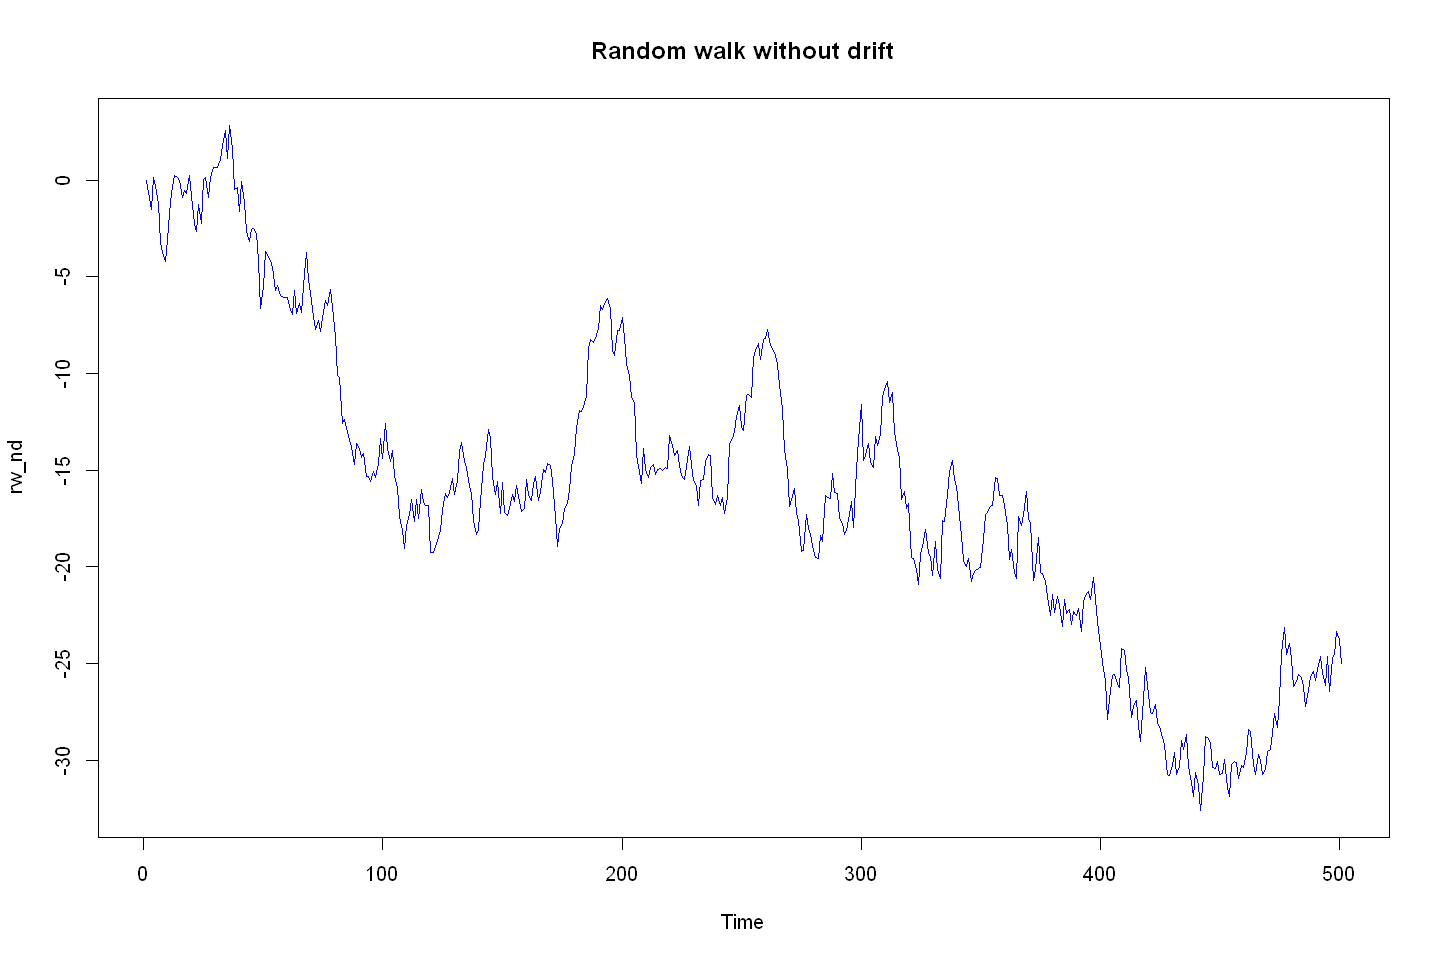

In [6]:
plot.ts(rw_nd,col='blue', main='Random walk without drift')

After seeing a few realizations, is the random walk process without a drift **stationary**? Let's compute that analytically, and then confirm by simulations.

___
Simulate 1000 realizations of random walk without drift of length 500, i.e.
$$p_{t,k}= p_{t-1,k} + e_{t,k}, $$
where $t \in \{ 1,...,500 \} $, $k \in \{ 1,...,1000 \}$ $e_{t}$ is i.i.d. N(0,1) distributed, $p_0 = 0$.

We will need more dimensions to store the data.

In [7]:
l <- 501
rws <- matrix(ncol = 1000, nrow = l)
for (j in 1 : ncol(rws)){
  e <- rnorm(l)
  rws[1, j] <- 0
  for (i in 2 : l){
    rws[i, j] <- rws[i-1, j] + e[i]
}}

head(rws)

0.000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000
1.422353,-1.047312,0.7083638,1.389493,-0.8379014,1.3648661,-0.8011376,0.3997252,-0.5015577,-0.2095806,...,0.7459281,-0.4376289,-0.9132074,-0.8320179,-0.6323382,0.1904706,1.8149795,0.9950538,0.10157930,1.3129047
1.550143,1.025591,0.4697805,3.427530,-1.7908093,0.5669899,-0.9728075,0.7227647,-1.9027972,-0.6403305,...,0.9383633,-1.0633124,-3.1927047,-0.1552907,0.6918790,1.0160400,-0.2829002,1.3219247,-0.05304027,1.5417519
2.618597,2.158295,0.5827145,2.461534,-2.0975234,2.0441680,-1.1588236,-0.1200989,-3.0754459,0.2717298,...,1.1747887,-0.3415010,-4.8969795,-1.5614919,-0.1649478,0.5996686,0.1910085,0.9966931,-0.74759337,0.5572549
1.664961,3.662451,-1.0773602,2.106833,-3.6450096,2.1349791,-2.6179164,1.6114780,-3.6732818,-1.1088413,...,2.5651950,0.1788320,-7.1276601,-1.2815700,-1.2389545,0.2572025,2.2511595,0.3986556,0.15757711,-0.4859634
1.157818,3.598081,-0.2129373,1.980379,-3.9603599,1.9879707,-1.9517303,0.9263862,-4.4547694,-0.6735907,...,2.8302742,2.0185770,-6.3188785,-0.8863065,-0.4891762,0.7480713,1.4556069,1.3359099,-1.44300932,-1.6904815


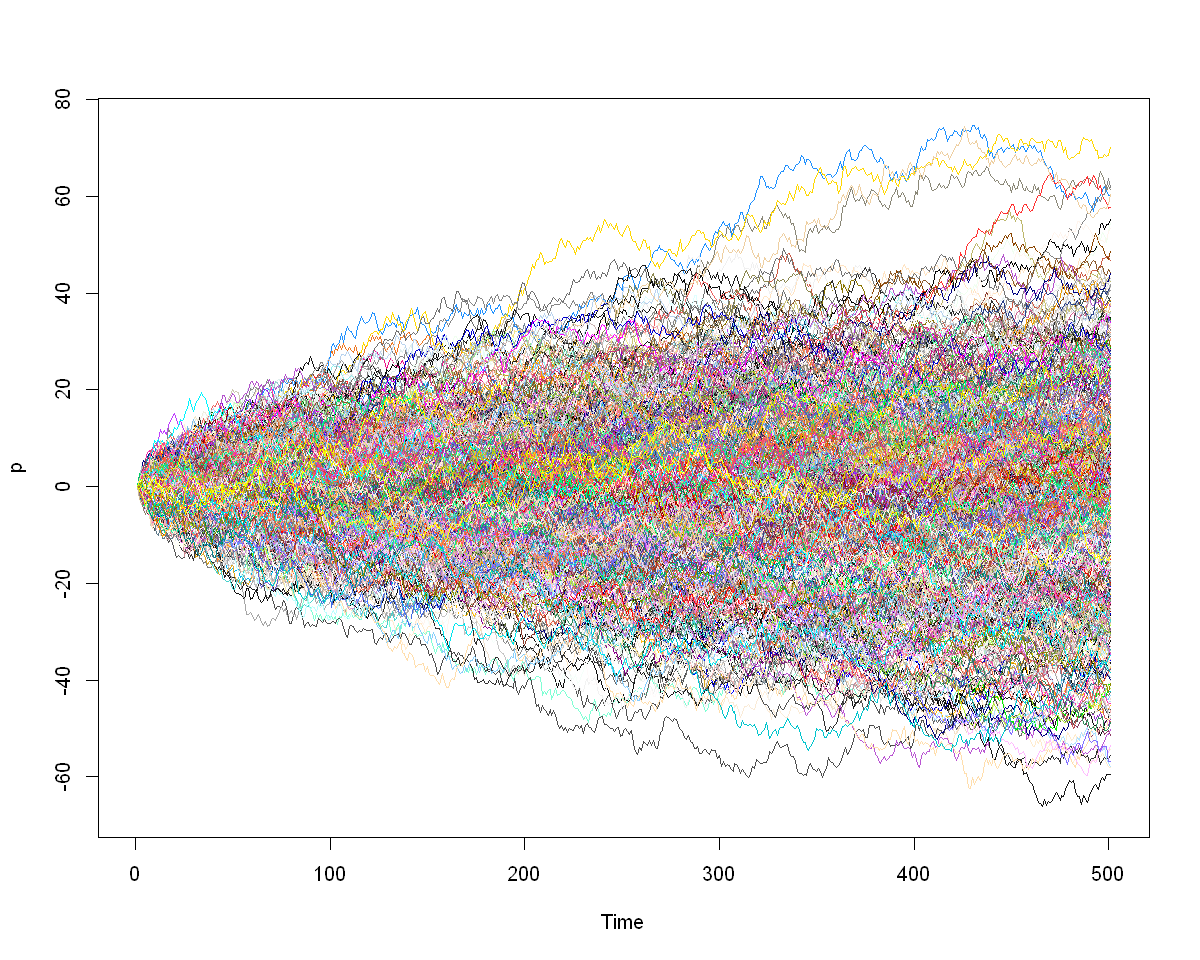

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot.ts(rws[, 1], ylim = c(min(rws),max(rws)), ylab = 'p')
for (j in 2:ncol(rws)){
   lines(rws[, j], col = colors()[j])
}



Let's confront this with theoretical predictions

* simulated mean and variance in black
* theoretical mean and variance in grey area
* realizations of the process in light blue

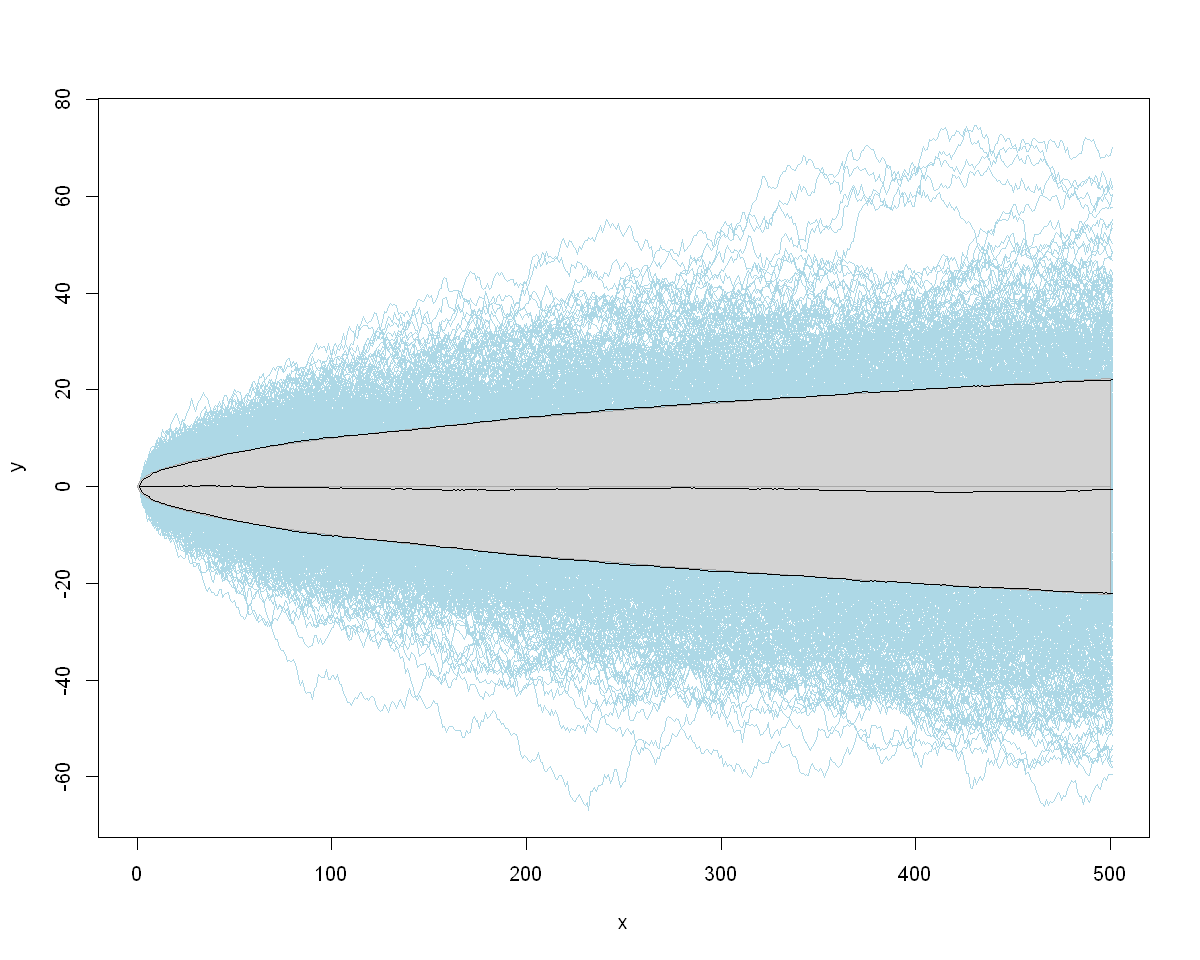

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8)

x <- c(0:500, 500:0)
y <- c(c(0, sqrt(seq(1,500,1))), rev(c(0, -sqrt(seq(1,500,1)))))

plot(x, y, ylim = c(min(rws), max(rws)), type = "l")

#plot.ts(rws[, 1], ylim = c(min(rws),max(rws)), ylab = 'p')
for (j in 1:ncol(rws)){
   lines(rws[, j], col = "lightblue")
}

polygon(x, y, col = "lightgray", border = "darkgray")
lines(rep(0, 500), col = "darkgray")

lines(apply(rws, 1, mean),ylim = c(-30,30), type = "l",col = "black")
lines(sqrt(apply(rws, 1, var)),col="black")
lines(-sqrt(apply(rws, 1, var)),col="black")

Now it is quite visible that the mean is $p_0 = 0$, while variance is increasing with time.

What happens if we add drift $\mu$?

#### Exercise:

Simulate a realization of random walk with drift

$$ p_t = \mu + p_{t - 1} + \epsilon_t,$$

where $\mu = 0.5$, and $t \in [1, 500]$, and plot it.


In [10]:
l <- 501
e <- rnorm(l)
rw_d <- vector()
rw_d[1] <- 0
mu <- 0.5
for (t in 2 : l){
    rw_d[t] <- mu + rw_d[t-1] + e[t]
}

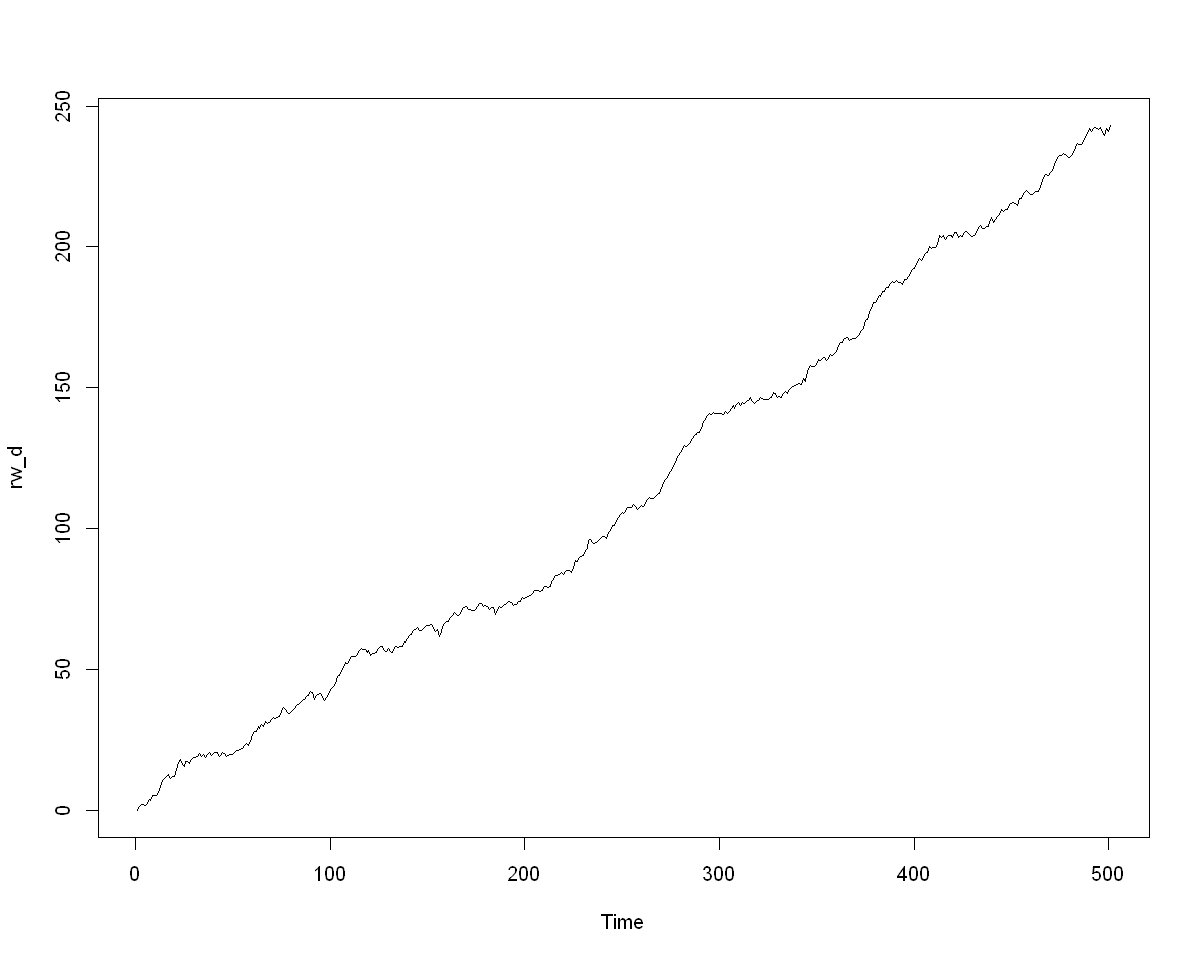

In [11]:
plot.ts(rw_d)

___
What will happen if drift is changed to negative values?


Simulate 500 realizations of Random Walk with $\mu = 0.5$, and 500 realizations of random walk with $\mu = - 0.5$. Plot them into the same graph.

In [12]:
l <- 501
rws <- matrix(ncol = 1000, nrow = l)
for (j in 1 : (ncol(rws) / 2)){
  e <- rnorm(l)
  rws[1, j] <- 0
  for (i in 2 : l){
    rws[i, j] <- 0.5 + rws[i-1, j] + e[i]
}}

for (j in ((ncol(rws) / 2) + 1) : ncol(rws)){
e <- rnorm(l)
rws[1, j] <- 0
for (i in 2 : l){
    rws[i, j] <- -0.5 + rws[i-1,j] + e[i]
}}

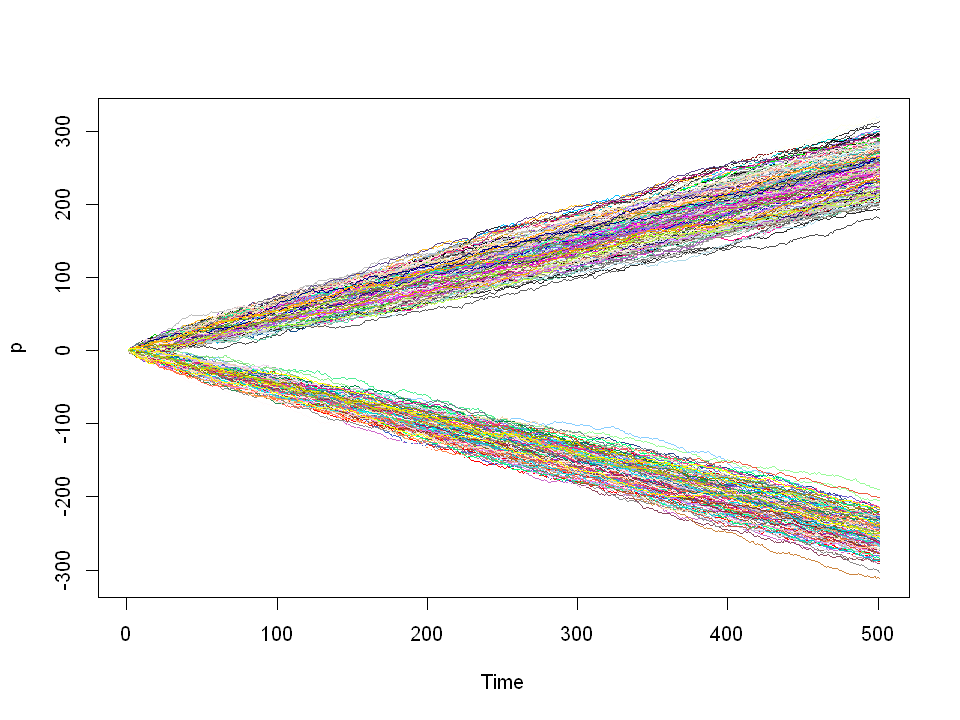

In [13]:
options(repr.plot.width=8, repr.plot.height=6)

plot.ts(rws[, 1], ylim = c(min(rws),max(rws)),ylab = 'p')
for (j in 2:ncol(rws)){
   lines(rws[, j], col = colors()[j])
}

We have already derived that Random Walk is a non-stationary process, but how do we formally test that? A handy visual tool to check if time series are stationary is the **autocorrelation function (ACF)**. 

Take the Random Walk without drift we simulated earlier, and simulate a White Noise of length 500. Then compare the ACFs. 

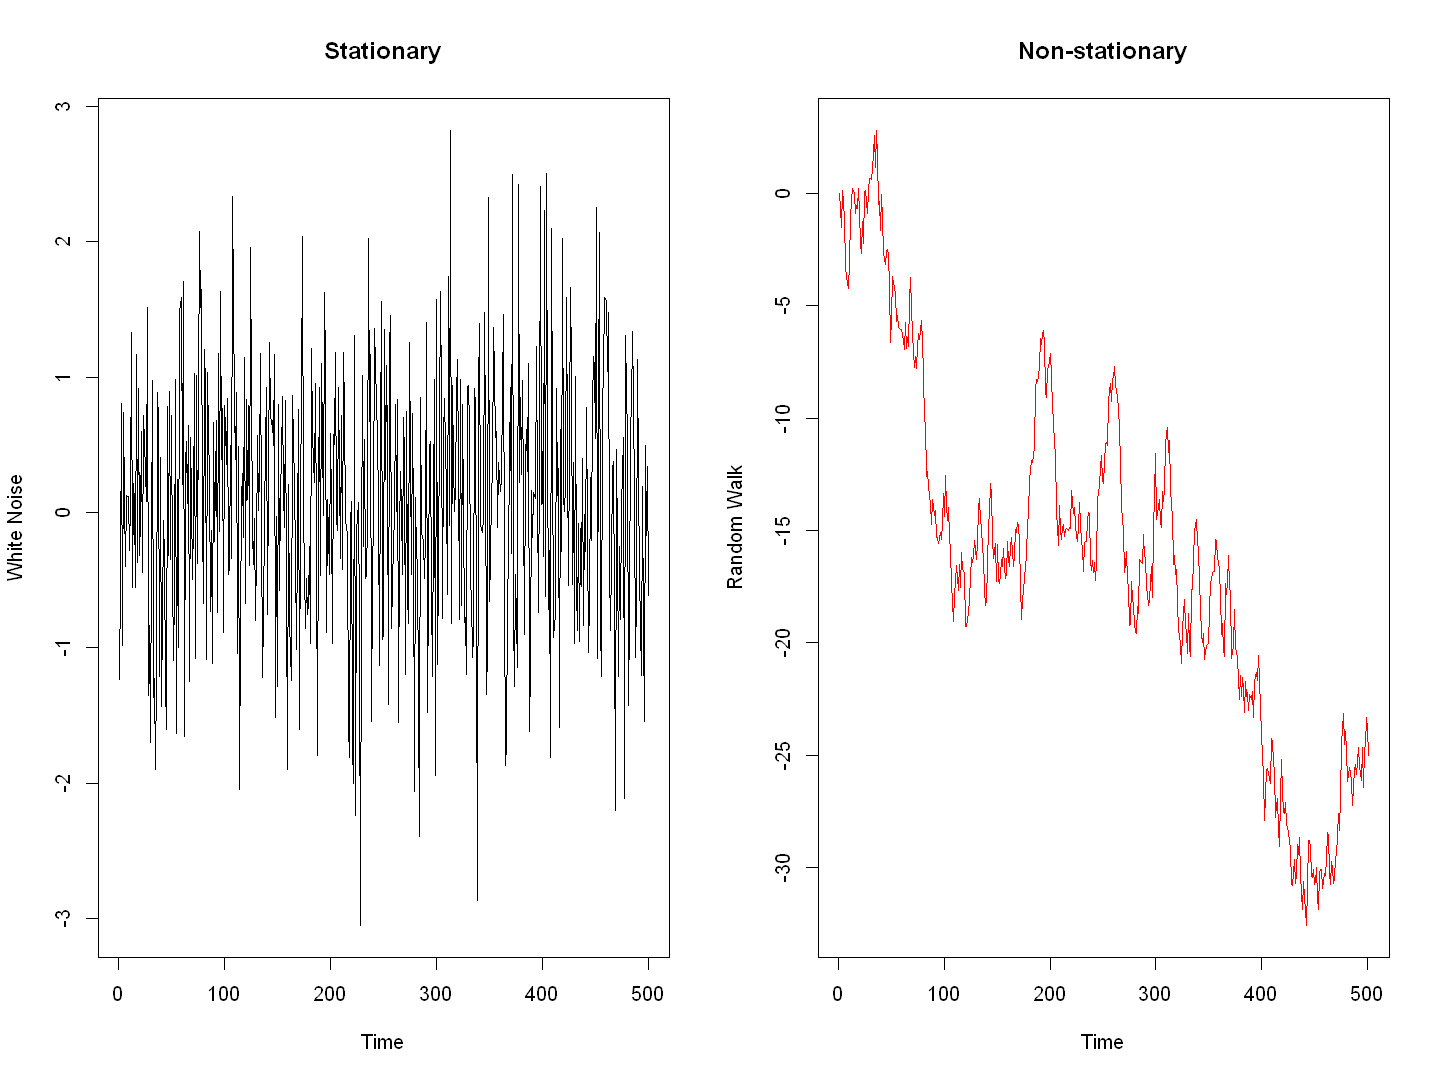

In [14]:
options(repr.plot.width = 12, repr.plot.height = 9)

set.seed(880)

wn <- rnorm(500)
par(mfrow = c(1, 2))
plot.ts(wn, main = 'Stationary', ylab = 'White Noise')
plot.ts(rw_nd, col = 'red', main= 'Non-stationary', ylab = 'Random Walk')

Now check the ACFs and Partial ACFs (PACF) of these two series.

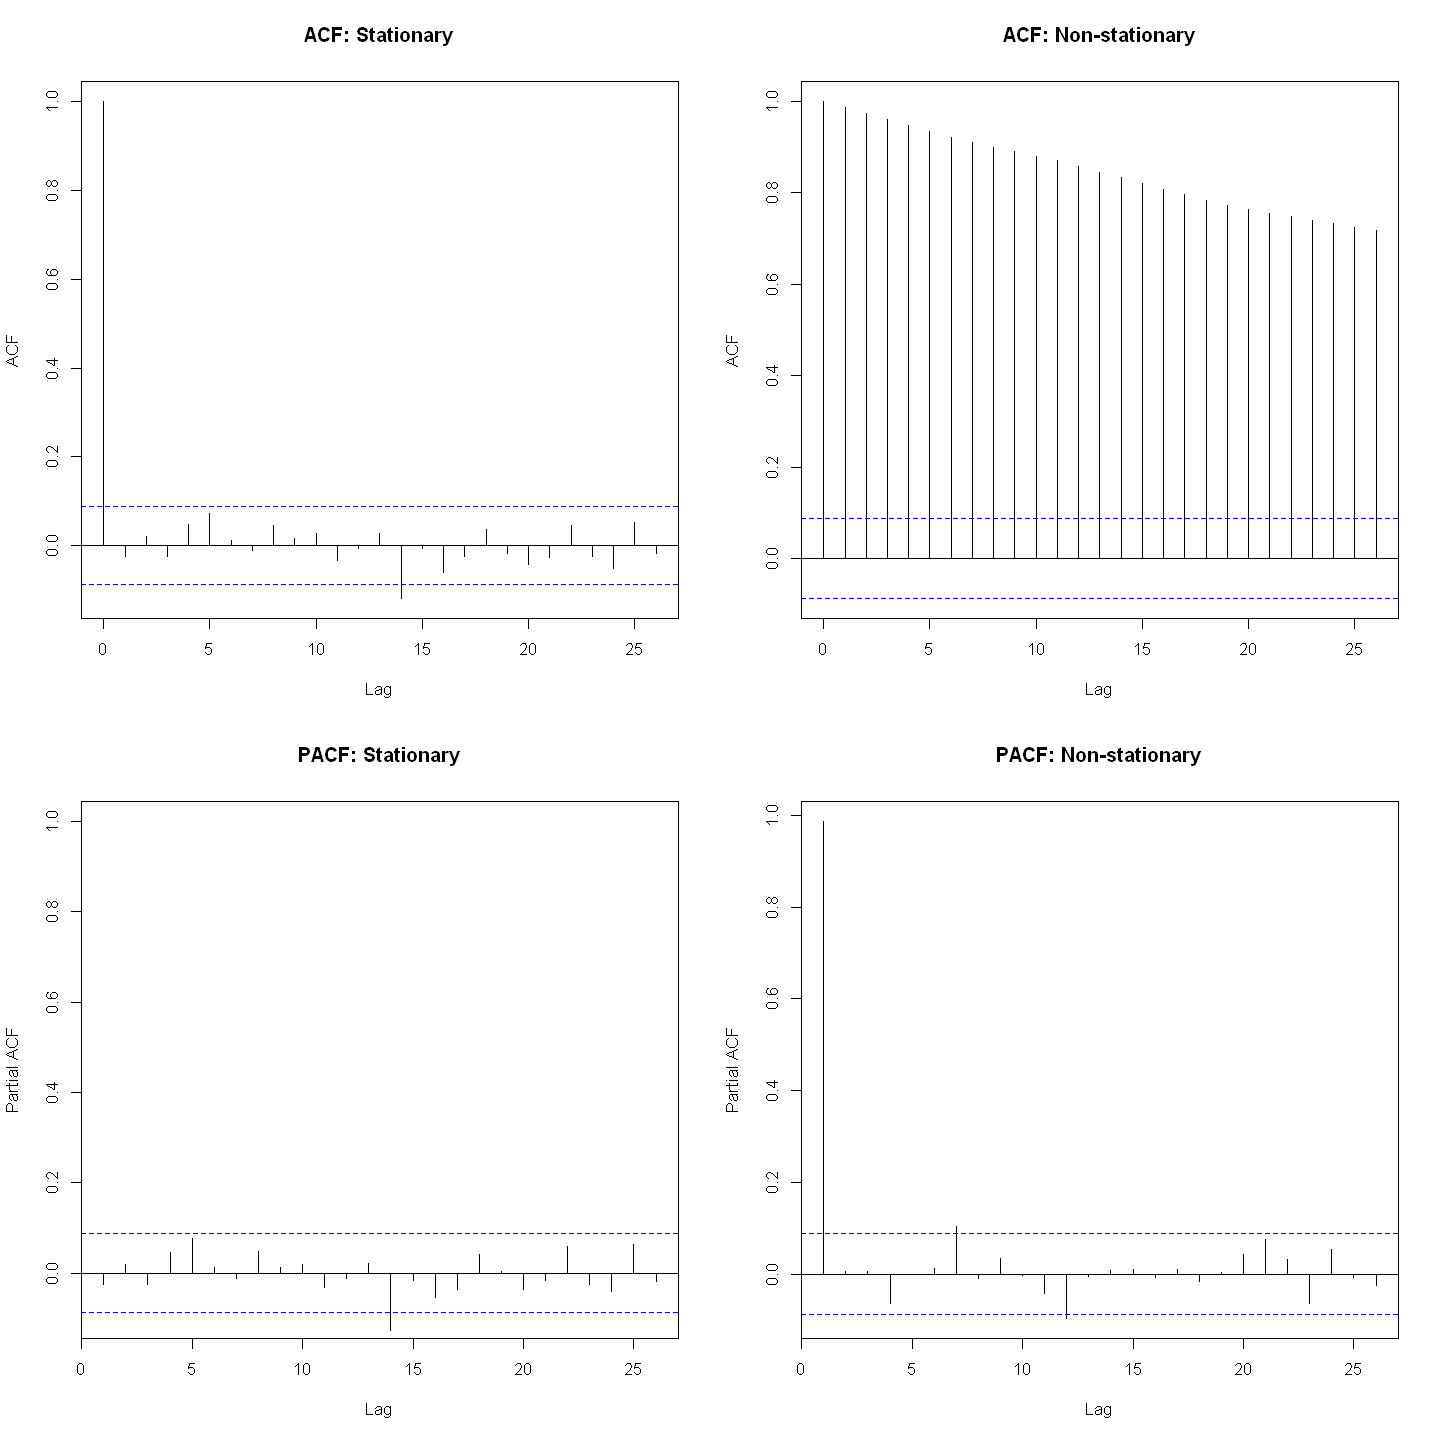

In [15]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(2, 2))

acf(wn, main = 'ACF: Stationary')
acf(rw_nd, main = 'ACF: Non-stationary')

pacf(wn, main = 'PACF: Stationary', ylim = c(-.1, 1))
pacf(rw_nd, main = 'PACF: Non-stationary')

Do you know the difference between ACF and PACF?

### Tests

[Motivation for testing stationarity](https://www.tylervigen.com/spurious-correlations)

ACF measure correlation of time series with each of its lags. Often, we want to test joint significance of autocorrelation at several lags. In that instance, we can use the Ljung and Box Q test. The null hypothesis is that autocorrelation at lags 1 to m are jointly zero, i.e. $H_0 : \rho_1 = \rho_2 = ... = \rho_m = 0$, against $H_1 : \rho_i \neq 0$.

In [16]:
Box.test(rw_nd, type = 'Ljung-Box')
Box.test(wn, type = 'Ljung-Box')

Box.test(rw_nd, lag = 5, type = 'Ljung-Box')
Box.test(wn, lag = 5, type = 'Ljung-Box')


	Box-Ljung test

data:  rw_nd
X-squared = 490.84, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  wn
X-squared = 0.29116, df = 1, p-value = 0.5895



	Box-Ljung test

data:  rw_nd
X-squared = 2336.2, df = 5, p-value < 2.2e-16



	Box-Ljung test

data:  wn
X-squared = 4.6814, df = 5, p-value = 0.456


___
We reject the null hypothesis for Random Walk, while there is no evidence of significant autocorrelation for White Noise. 

Formally, stationarity can be tested using the Dickey-Fuller or augmented Dickey-Fuller (ADF) tests. The null hypothesis is presence of unit root, hence non-stationarity.

In [17]:
library(tseries)
adf.test(rw_nd, k = 1)
adf.test(wn, k = 1)


	Augmented Dickey-Fuller Test

data:  rw_nd
Dickey-Fuller = -2.8746, Lag order = 1, p-value = 0.2081
alternative hypothesis: stationary


Warning message in adf.test(wn, k = 1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  wn
Dickey-Fuller = -15.644, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


___
The results are exactly, as we would expect, presence of unit root is not rejected for non-stationary Random Walk, and is rejected for stationary White Noise.

Other type of unit root test is Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test. Unlike in other tests, presence of unit root is an alternative hypothesis here. Moreover, we can set the null to *level stationarity*, or *stationarity under a deterministic trend*.

In [18]:
kpss.test(rw_nd, null = "Level")
kpss.test(wn, null = "Level")

Warning message in kpss.test(rw_nd, null = "Level"):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  rw_nd
KPSS Level = 6.1264, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(wn, null = "Level"):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  wn
KPSS Level = 0.0854, Truncation lag parameter = 5, p-value = 0.1


In [19]:
kpss.test(rw_nd, null = "Trend")
kpss.test(wn, null = "Trend")

Warning message in kpss.test(rw_nd, null = "Trend"):
"p-value smaller than printed p-value"


	KPSS Test for Trend Stationarity

data:  rw_nd
KPSS Trend = 0.51033, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(wn, null = "Trend"):
"p-value greater than printed p-value"


	KPSS Test for Trend Stationarity

data:  wn
KPSS Trend = 0.047429, Truncation lag parameter = 5, p-value = 0.1


### Properties of real-world data

Let's observe properties of a real-world financial time series. Download prices of S&P 500 index.

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR


[1] "SP500"

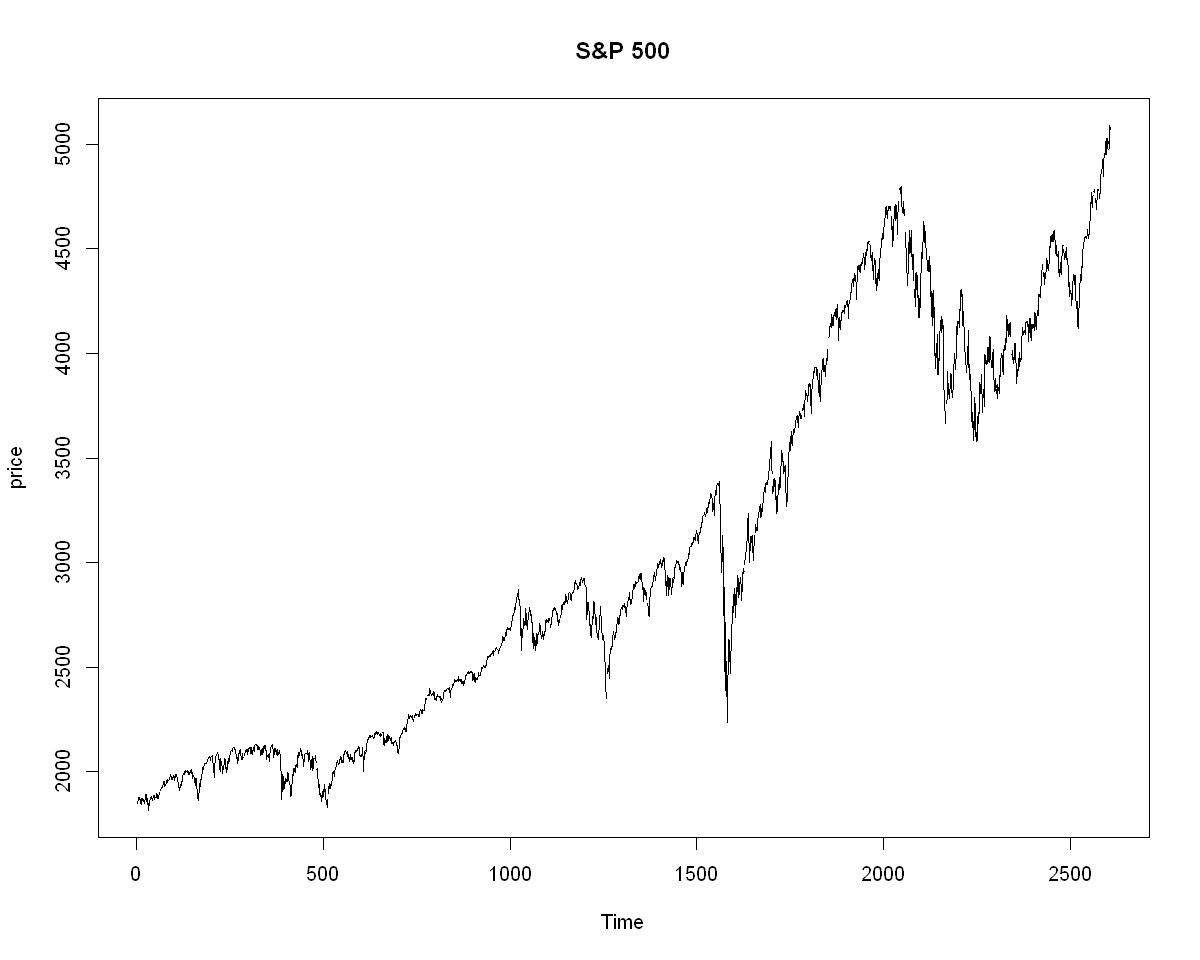

In [20]:
options(repr.plot.width = 10, repr.plot.height = 8)
library("quantmod")

getSymbols('SP500', src='FRED', return.class='xts')
plot.ts(SP500, ylab = 'price', main = 'S&P 500')

In [22]:
par(mfrow = c(1, 2))

acf(SP500)
pacf(SP500)

ERROR: Error in na.fail.default(as.ts(x)): missing values in object


In [23]:
sum(is.na(SP500))

[1] 92

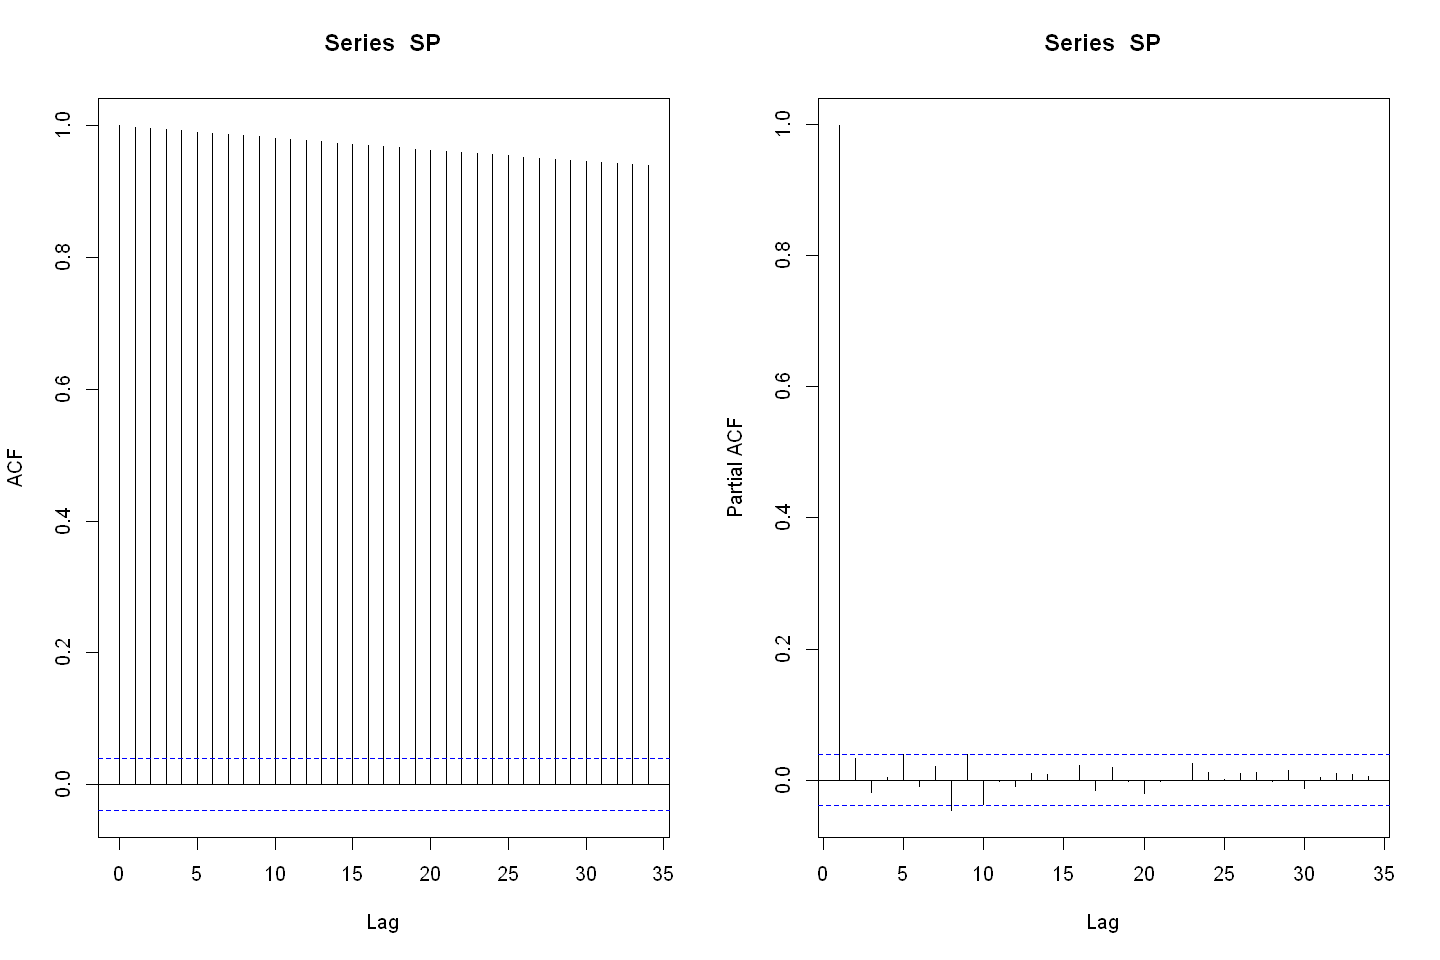

In [24]:
options(repr.plot.width = 12, repr.plot.height = 8)

SP <- (na.omit(SP500))
SP <- as.numeric(SP)

par(mfrow = c(1, 2))
acf(SP)
pacf(SP)

In [25]:
Box.test(SP, type = 'Ljung-Box')
Box.test(SP, type = 'Ljung-Box', lag = 3)

adf.test(SP, k = 1)
adf.test(SP)

kpss.test(SP, null = 'Level')
kpss.test(SP, null = 'Trend')


	Box-Ljung test

data:  SP
X-squared = 2508.7, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  SP
X-squared = 7500.2, df = 3, p-value < 2.2e-16



	Augmented Dickey-Fuller Test

data:  SP
Dickey-Fuller = -2.579, Lag order = 1, p-value = 0.3332
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  SP
Dickey-Fuller = -2.6541, Lag order = 13, p-value = 0.3014
alternative hypothesis: stationary


Warning message in kpss.test(SP, null = "Level"):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  SP
KPSS Level = 26.106, Truncation lag parameter = 8, p-value = 0.01


Warning message in kpss.test(SP, null = "Trend"):
"p-value smaller than printed p-value"


	KPSS Test for Trend Stationarity

data:  SP
KPSS Trend = 1.9548, Truncation lag parameter = 8, p-value = 0.01


___
Just from the plain plot of S&P 500, we can see the series is not stationary. The autocorrelation function displays a high degree of autocorrelation. The null hypothesis of no autocorrelation is rejected by the Ljung-Box Q test. 

Stationarity tests suggest non-stationarity, with exception of ADF test looking for unit root only at the 1st lag. If we use the number of lags as predetermined by ADF test (13 for our sample size), we fail to reject the null hypothesis of unit root at 5 % level.

Overall, the tests suggest, the series of S&P 500 prices is **not stationary**. This is usual for stock prices, and it is one of the reasons why we work with returns instead of prices. 

_____

We will compute the log-returns of S\&P 500, and repeat the tests.

In [26]:
rets <- na.omit(diff(log(SP500)))

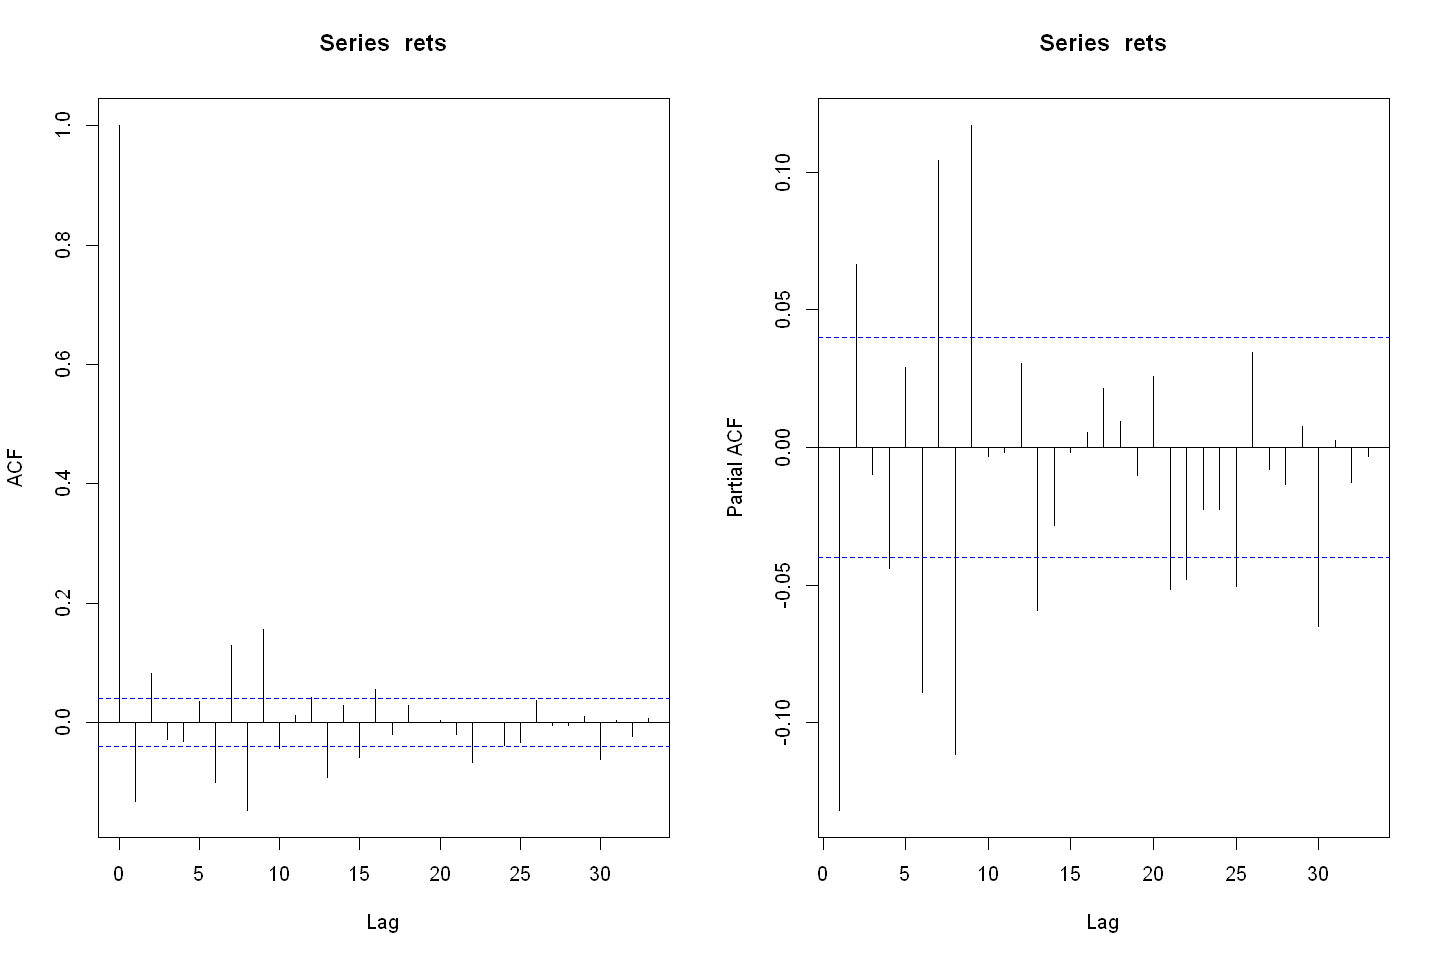

In [27]:
par(mfrow = c(1, 2))

acf(rets)
pacf(rets)

options(repr.plot.width = 15, repr.plot.height = 12)

In [28]:
Box.test(rets, type = 'Ljung-Box')

adf.test(rets, k = 1)

kpss.test(rets, null = 'Level')
kpss.test(SP, null = 'Trend')


	Box-Ljung test

data:  rets
X-squared = 42.085, df = 1, p-value = 8.74e-11


Warning message in adf.test(rets, k = 1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  rets
Dickey-Fuller = -34.606, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in kpss.test(rets, null = "Level"):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  rets
KPSS Level = 0.058059, Truncation lag parameter = 8, p-value = 0.1


Warning message in kpss.test(SP, null = "Trend"):
"p-value smaller than printed p-value"


	KPSS Test for Trend Stationarity

data:  SP
KPSS Trend = 1.9548, Truncation lag parameter = 8, p-value = 0.01


___
When we use returns of S&P 500, the properties improve. The Ljung-Box Q test still rejects the hypothesis of no autocorrelation, however the individual deviatons are on the edge of statistical significance.

Based on the ADF test, we reject the null hypothesis of unit root, based on the KPSS test, we do not reject the null hypothesis of neither level or trend stationarity.

Let's download the prices of the stocks that we worked with on Seminar 1.

In [29]:
symbols <- c('MSFT', 'AAPL', 'GOOG', 'AMZN', 'NFLX', 'TSLA')
data <- lapply(symbols, function(y){
    getSymbols(y, auto.assign = FALSE, from = as.Date('2015-01-01'), to = '2021-12-31')
})
names(data) <- symbols

In [30]:
data <- lapply(names(data), function(y){
    data[[y]] <- data[[y]][, paste0(y, '.Close')]
})


In [31]:
lapply(data, head)

[[1]]
           MSFT.Close
2015-01-02      46.76
2015-01-05      46.33
2015-01-06      45.65
2015-01-07      46.23
2015-01-08      47.59
2015-01-09      47.19

[[2]]
           AAPL.Close
2015-01-02    27.3325
2015-01-05    26.5625
2015-01-06    26.5650
2015-01-07    26.9375
2015-01-08    27.9725
2015-01-09    28.0025

[[3]]
           GOOG.Close
2015-01-02   26.16865
2015-01-05   25.62315
2015-01-06   25.02928
2015-01-07   24.98640
2015-01-08   25.06518
2015-01-09   24.74058

[[4]]
           AMZN.Close
2015-01-02    15.4260
2015-01-05    15.1095
2015-01-06    14.7645
2015-01-07    14.9210
2015-01-08    15.0230
2015-01-09    14.8465

[[5]]
           NFLX.Close
2015-01-02   49.84857
2015-01-05   47.31143
2015-01-06   46.50143
2015-01-07   46.74286
2015-01-08   47.78000
2015-01-09   47.04143

[[6]]
           TSLA.Close
2015-01-02   14.62067
2015-01-05   14.00600
2015-01-06   14.08533
2015-01-07   14.06333
2015-01-08   14.04133
2015-01-09   13.77733


Compute the log-returns.

In [32]:
data <- lapply(data, function(y){
  y <- na.omit(diff(log(y)))  
    colnames(y) <- 'ret'
    return(y)
})
names(data) <- symbols

In [33]:
lapply(data, head)

$MSFT
                    ret
2015-01-05 -0.009238362
2015-01-06 -0.014786098
2015-01-07  0.012625288
2015-01-08  0.028993730
2015-01-09 -0.008440682
2015-01-12 -0.012581468

$AAPL
                     ret
2015-01-05 -2.857604e-02
2015-01-06  9.413332e-05
2015-01-07  1.392479e-02
2015-01-08  3.770251e-02
2015-01-09  1.071932e-03
2015-01-12 -2.494934e-02

$GOOG
                    ret
2015-01-05 -0.021065954
2015-01-06 -0.023449905
2015-01-07 -0.001714703
2015-01-08  0.003148076
2015-01-09 -0.013035137
2015-01-12 -0.007322685

$AMZN
                    ret
2015-01-05 -0.020730694
2015-01-06 -0.023098053
2015-01-07  0.010543957
2015-01-08  0.006812759
2015-01-09 -0.011818170
2015-01-12 -0.018765212

$NFLX
                    ret
2015-01-05 -0.052237971
2015-01-06 -0.017268799
2015-01-07  0.005178417
2015-01-08  0.021945623
2015-01-09 -0.015578464
2015-01-12 -0.032280774

$TSLA
                    ret
2015-01-05 -0.042950329
2015-01-06  0.005648256
2015-01-07 -0.001563152
2015-01-08 -0.00

Plot the log returns.

$MSFT
NULL

$AAPL
NULL

$GOOG
NULL

$AMZN
NULL

$NFLX
NULL

$TSLA
NULL

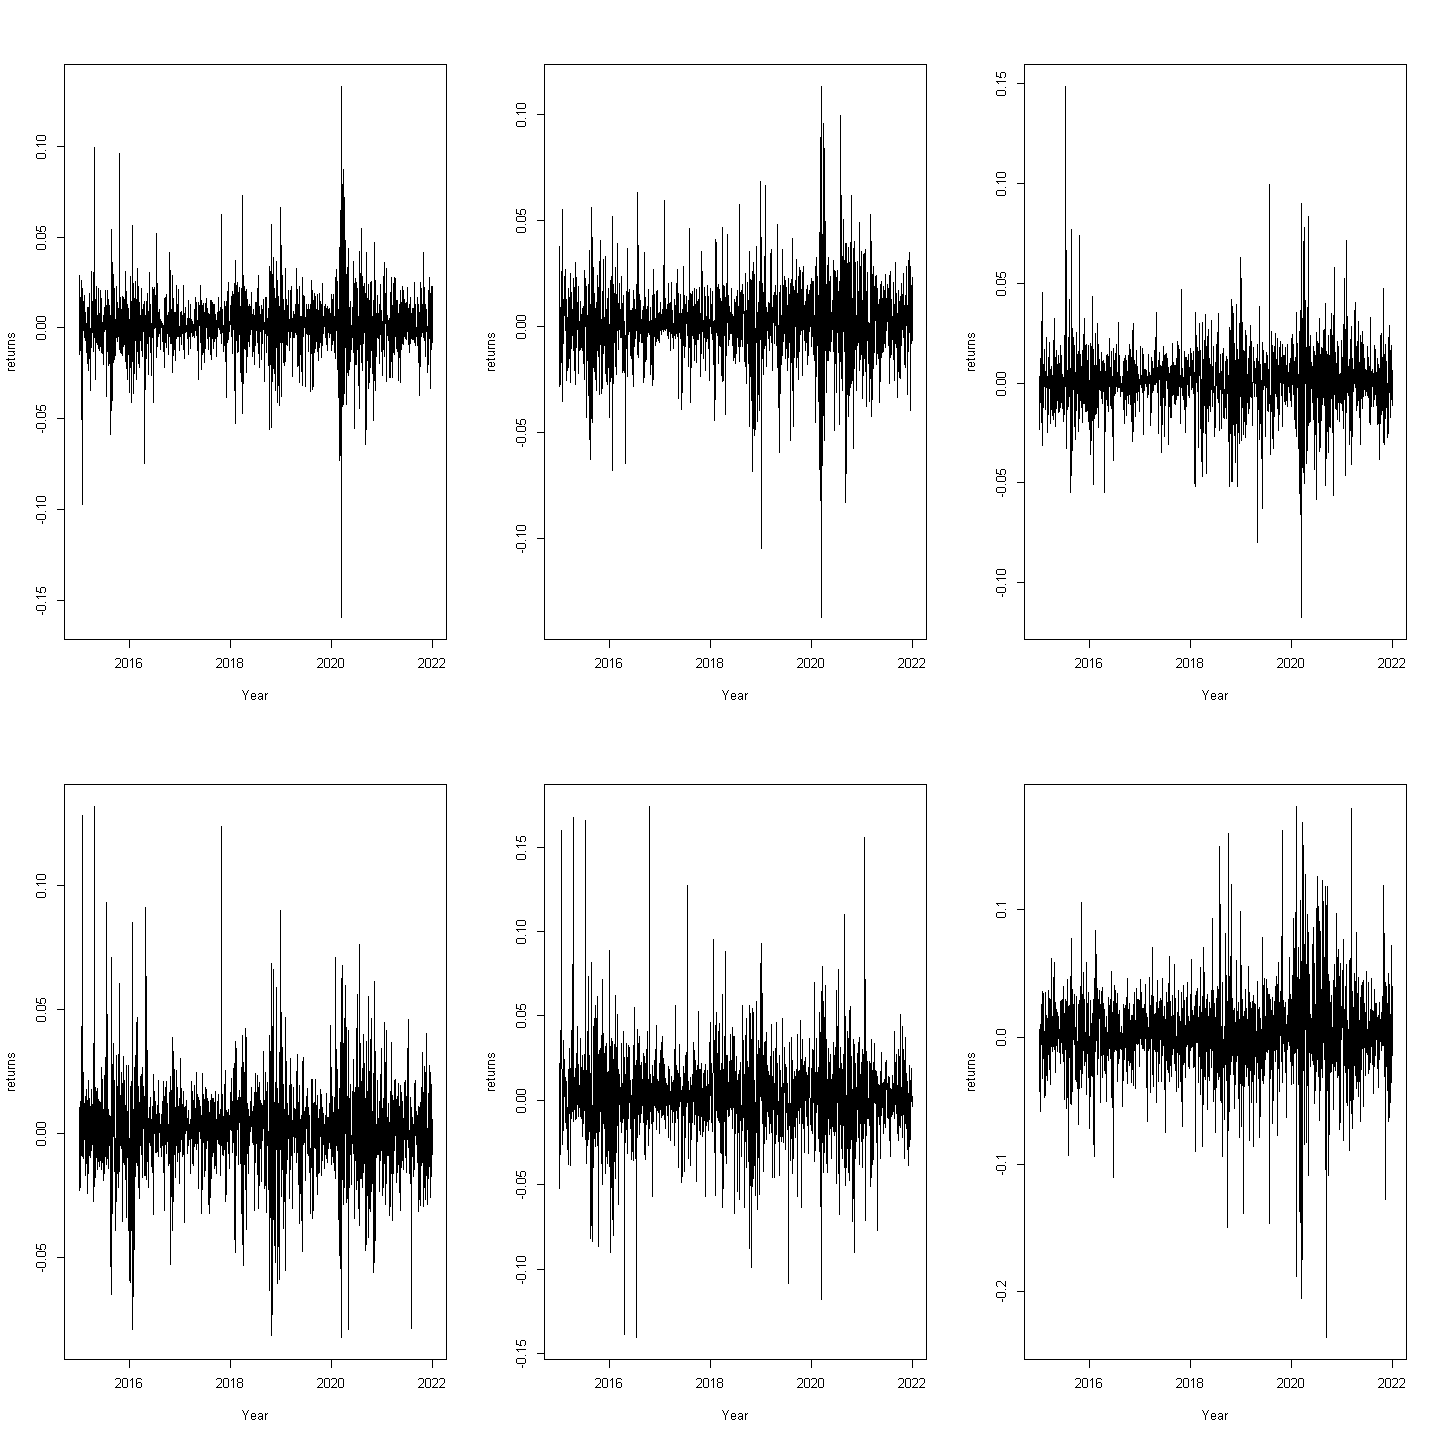

In [34]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(2, 3))
sapply(data, function(y){
    plot(as.Date(index(y)), y, type = 'l', xlab = 'Year',
     ylab = 'returns')
})

Look at the autocorrelation and partial autocorrelation function.

In [35]:
options(repr.plot.width = 24, repr.plot.height = 16)

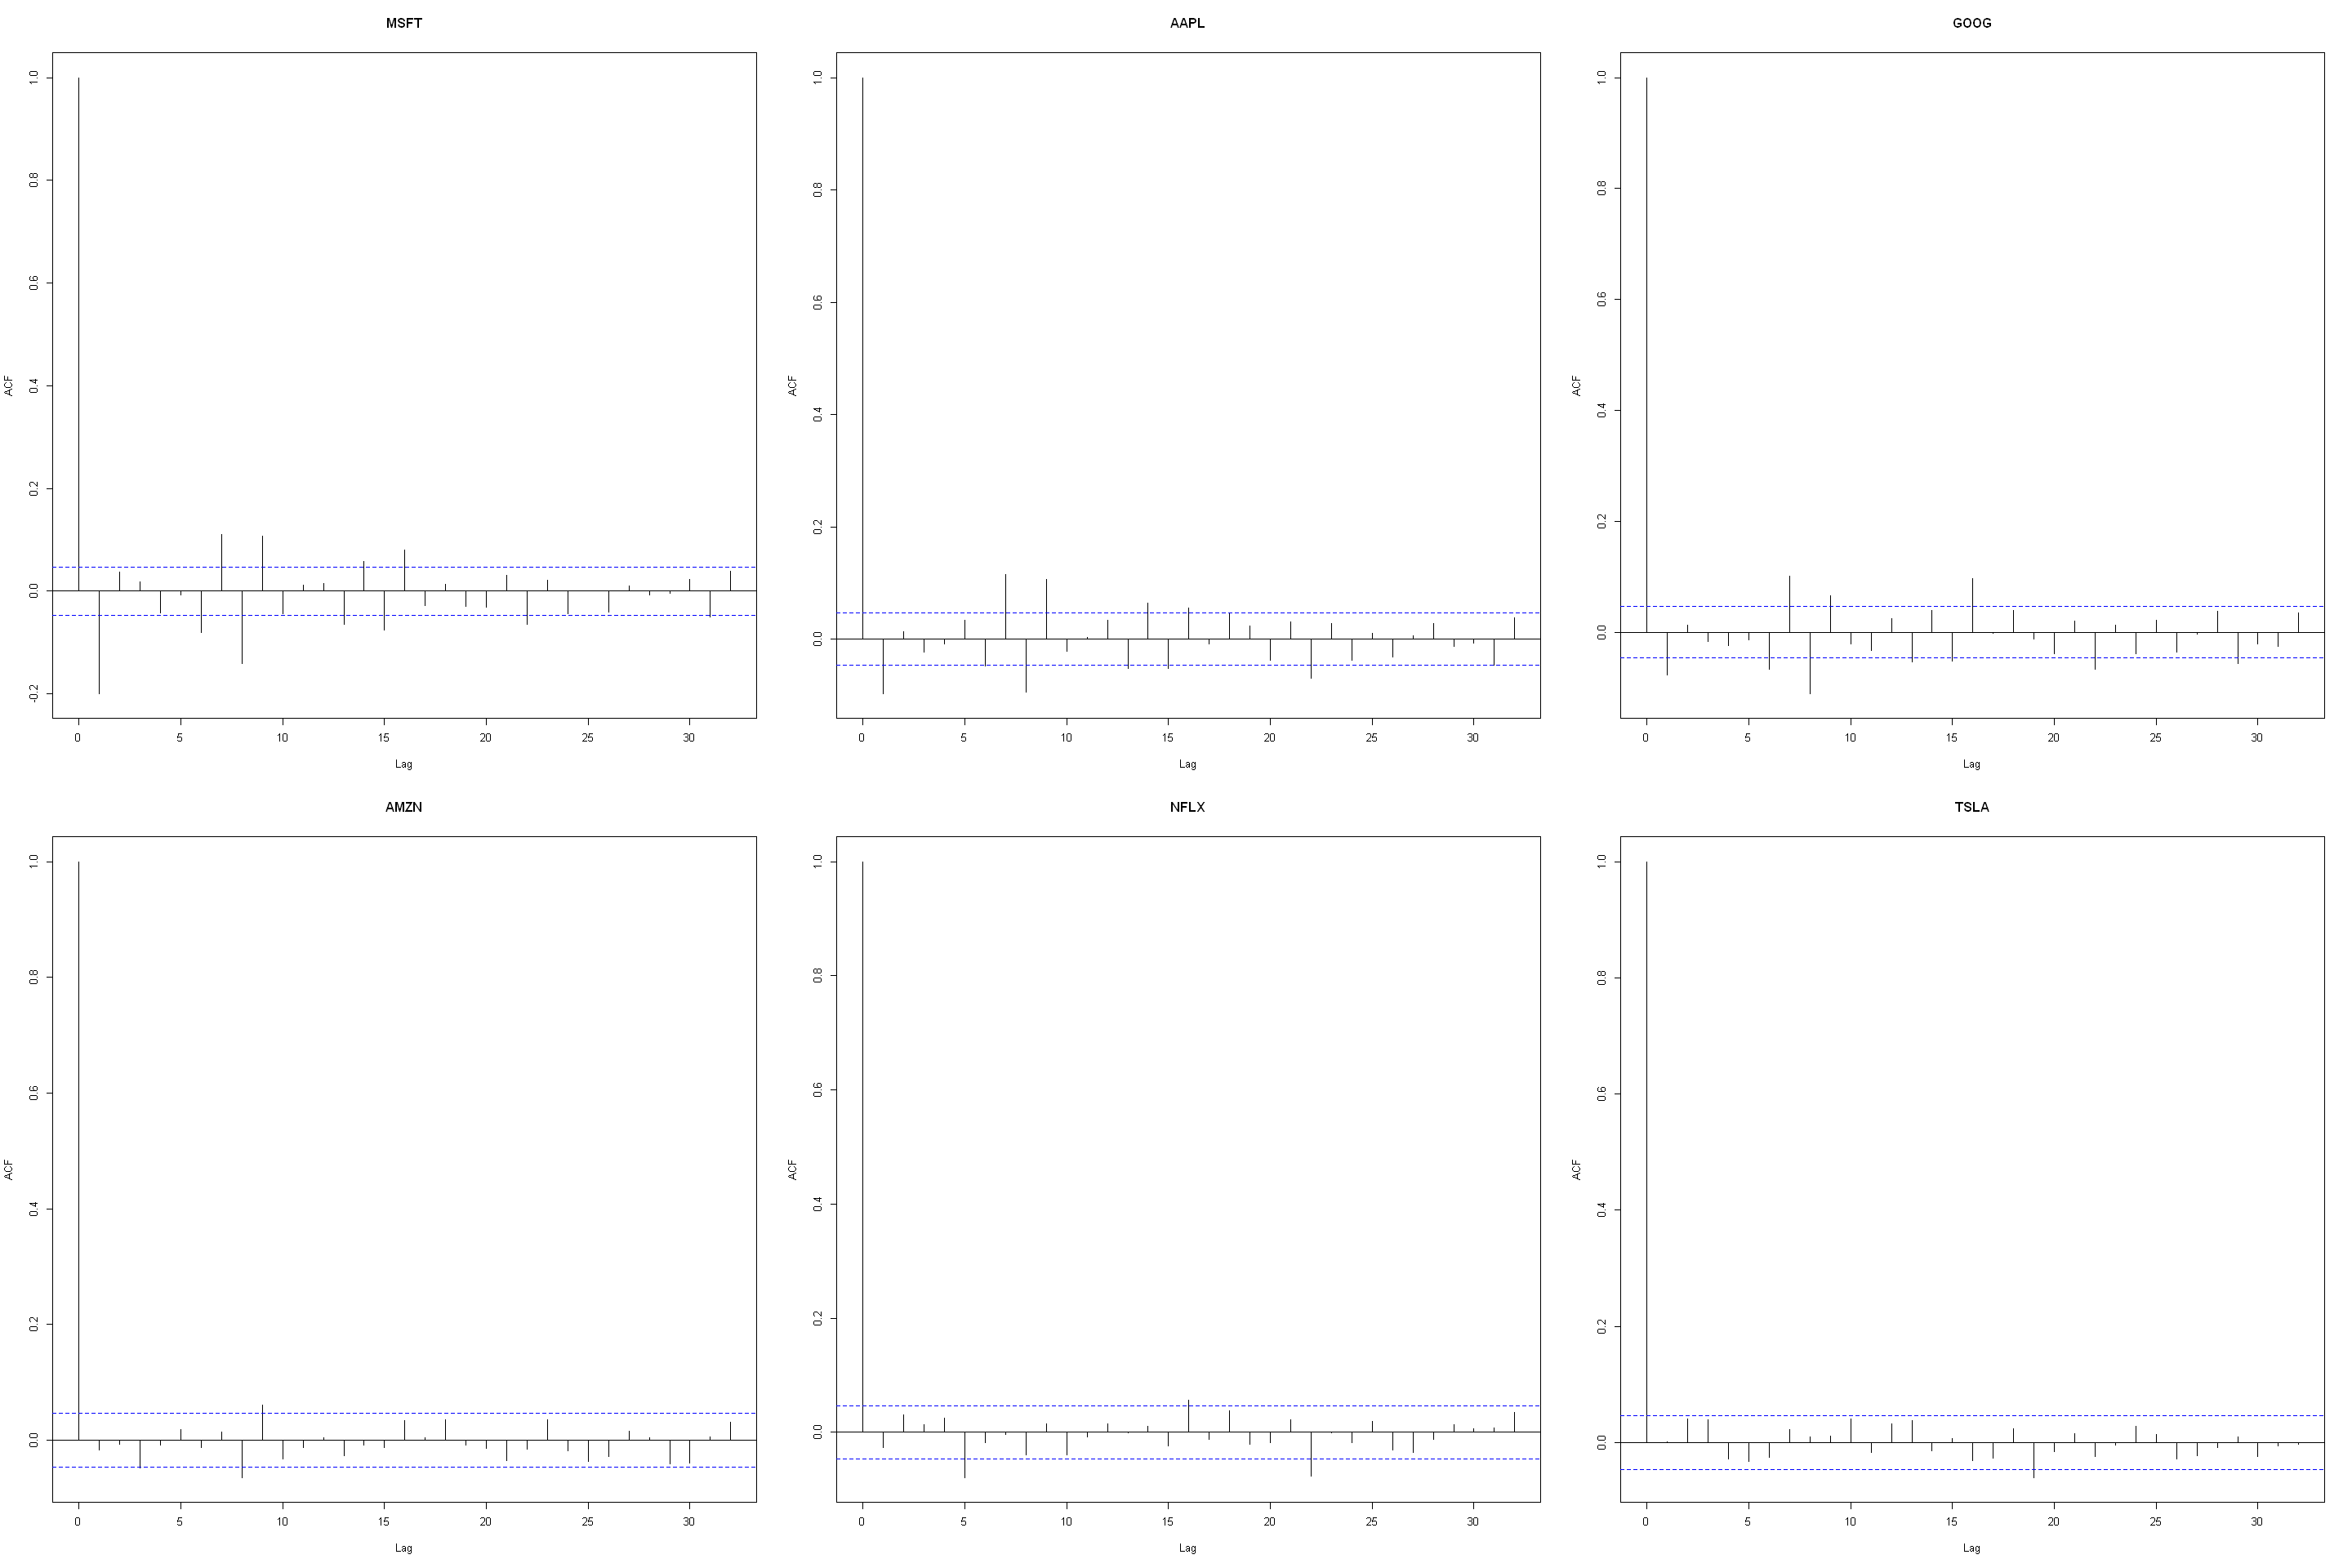

In [36]:
N <- length(data)
par(mfrow = c(2, 3))
for (i in 1:N){
    autocorrelation <- acf(as.numeric(data[[i]]), plot = FALSE)
    plot(autocorrelation, main = paste0(names(data)[i]), cex.main = 1.5)
}

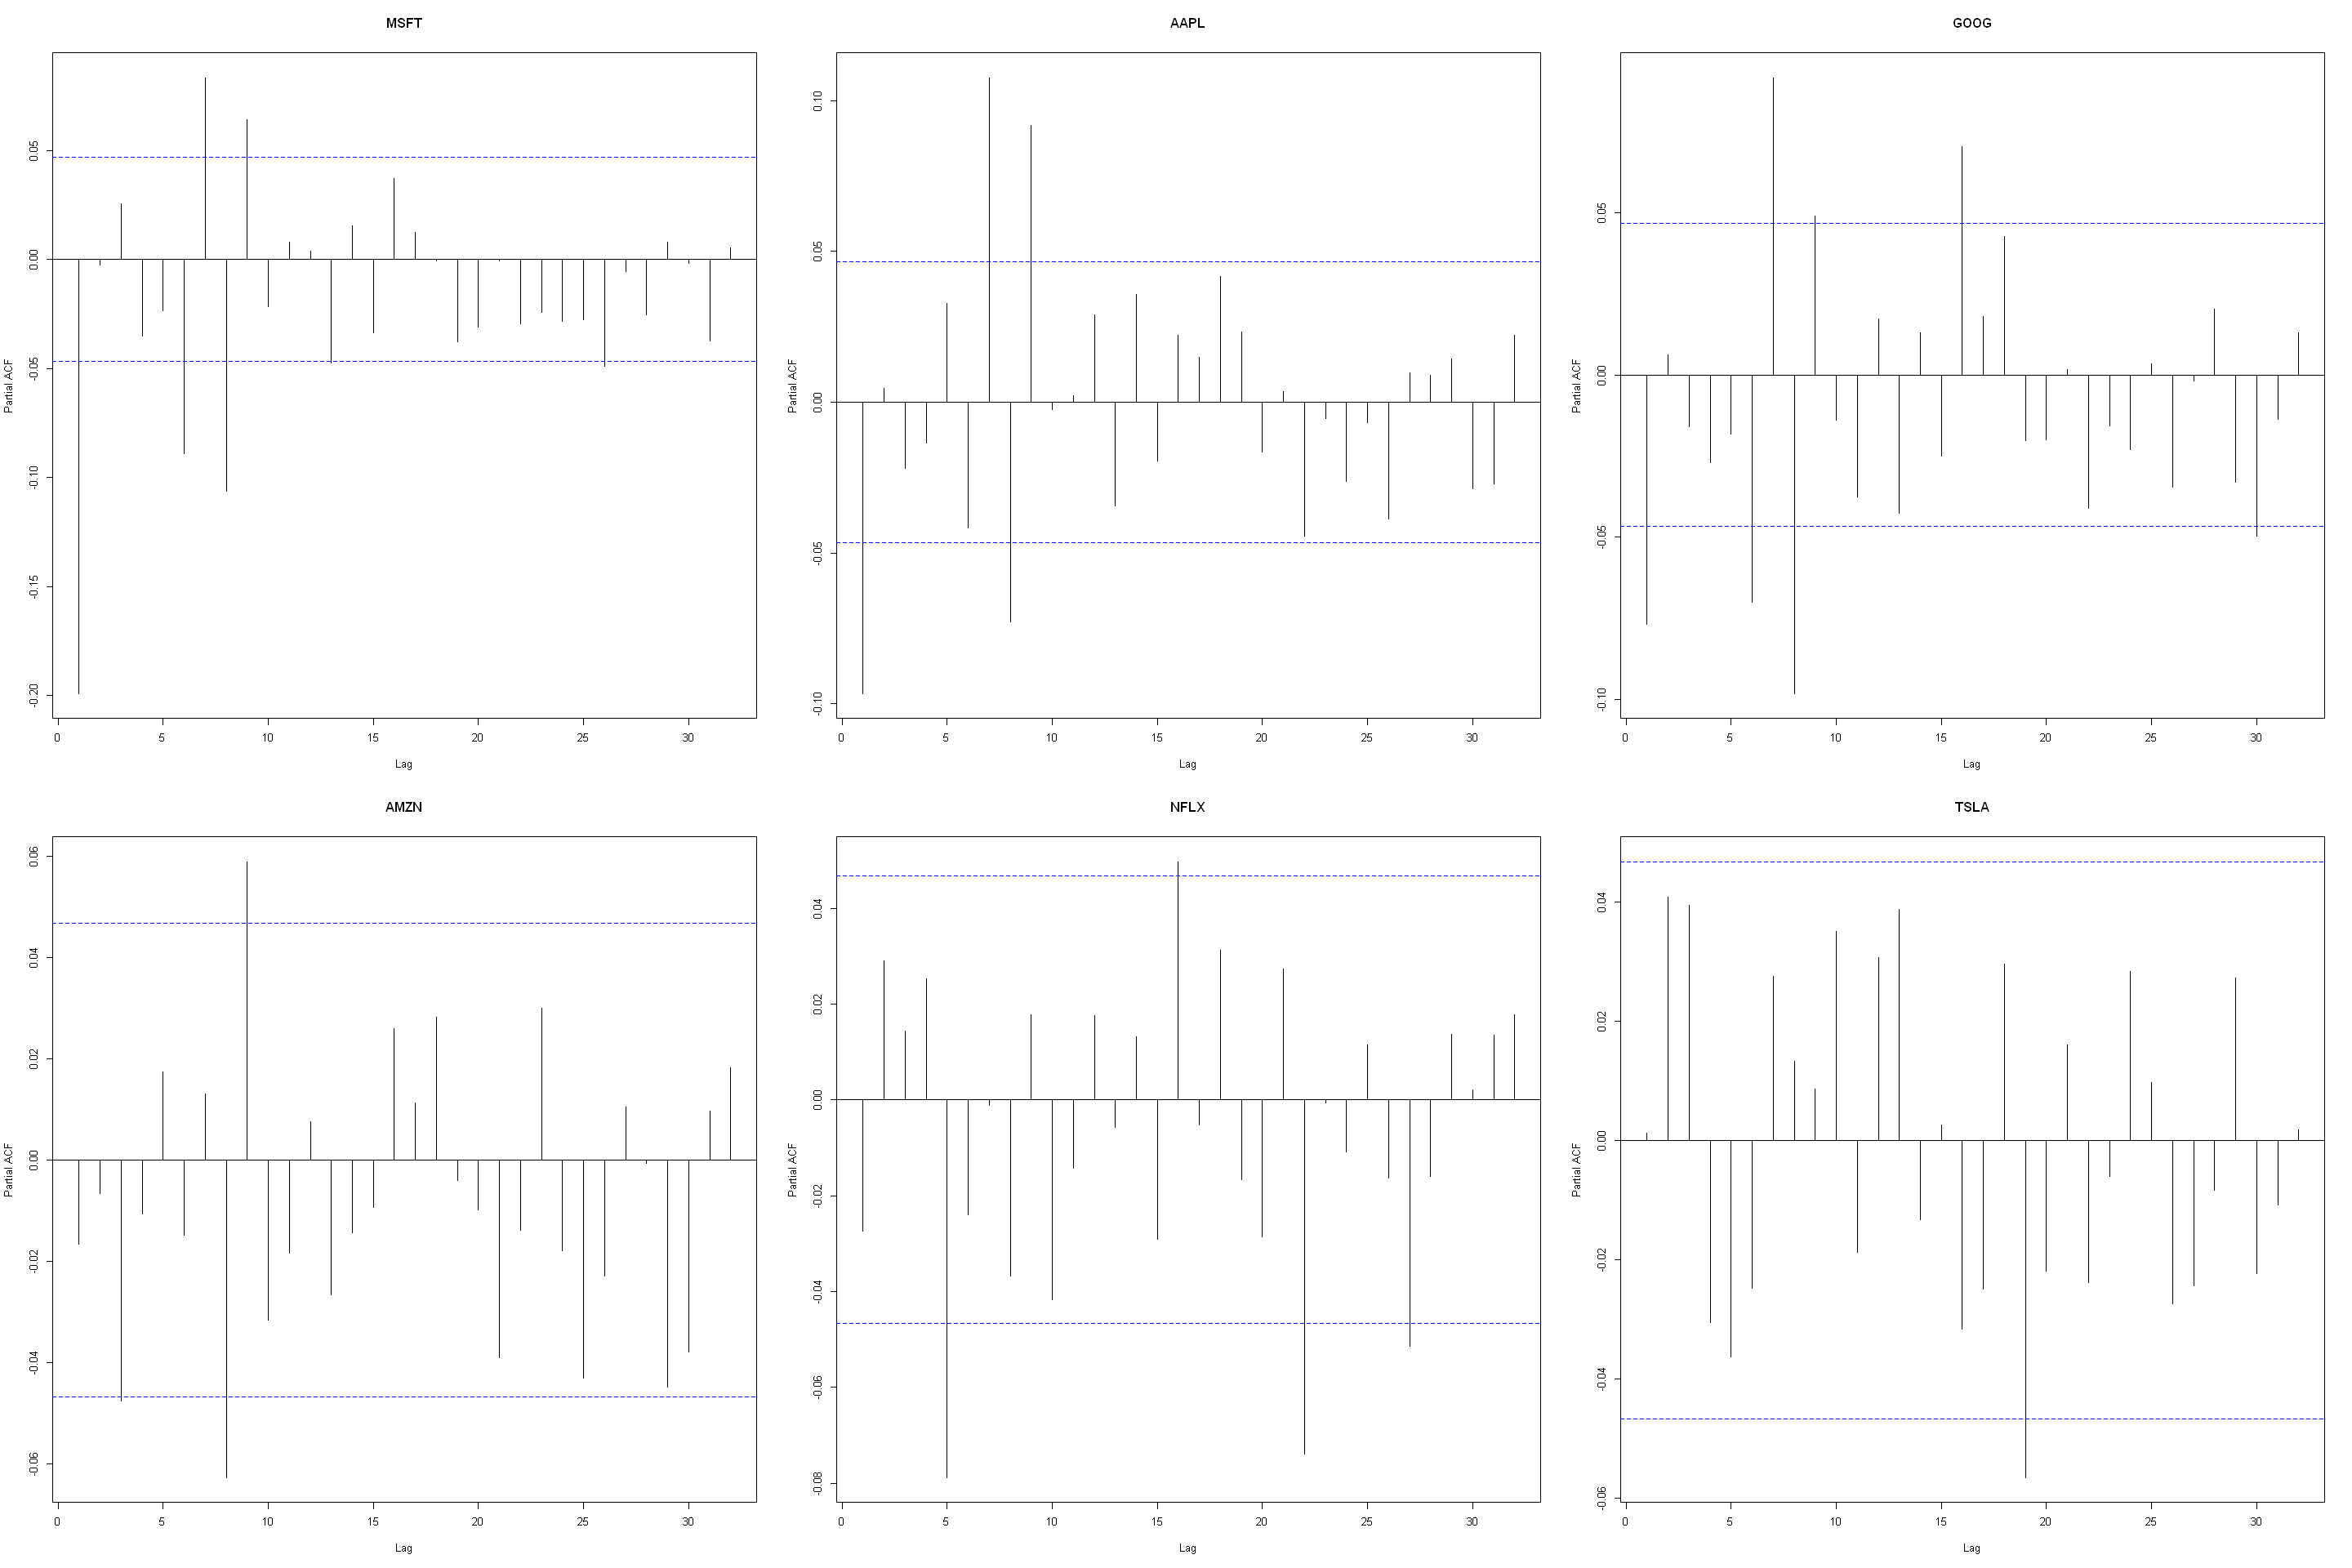

In [37]:
N <- length(data)
par(mfrow = c(2, 3))
for (i in 1:N){
    autocorrelation <- pacf(as.numeric(data[[i]]), plot = FALSE)
    plot(autocorrelation, main = paste0(names(data)[i]), cex.main = 1.5)
}

Apply ADF and KPSS tests on each series.

In [38]:
tests <- lapply(data, function(y){
    c(adf.test(y, k = 1)$p.value, kpss.test(y, null = 'Level')$p.value)
})


Warning message in adf.test(y, k = 1):
"p-value smaller than printed p-value"Warning message in kpss.test(y, null = "Level"):
"p-value greater than printed p-value"Warning message in adf.test(y, k = 1):
"p-value smaller than printed p-value"Warning message in kpss.test(y, null = "Level"):
"p-value greater than printed p-value"Warning message in adf.test(y, k = 1):
"p-value smaller than printed p-value"Warning message in kpss.test(y, null = "Level"):
"p-value greater than printed p-value"Warning message in adf.test(y, k = 1):
"p-value smaller than printed p-value"Warning message in kpss.test(y, null = "Level"):
"p-value greater than printed p-value"Warning message in adf.test(y, k = 1):
"p-value smaller than printed p-value"Warning message in kpss.test(y, null = "Level"):
"p-value greater than printed p-value"Warning message in adf.test(y, k = 1):
"p-value smaller than printed p-value"

In [39]:
tests <- sapply(tests, function(y){
    round(y, 4)
    })

In [40]:
rownames(tests) <- c('ADF', 'KPSS')
colnames(tests) <- symbols

In [41]:
tests

,MSFT,AAPL,GOOG,AMZN,NFLX,TSLA
ADF,0.01,0.01,0.01,0.01,0.01,0.0100
KPSS,0.10,0.10,0.10,0.10,0.10,0.0501
